# Tarea

1. Comparar haciendo en SAP o ETABs

In [1]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt

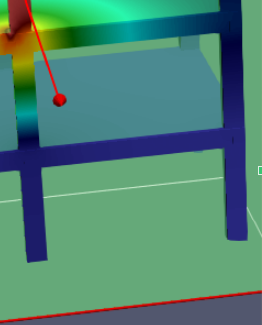

# Definir el material y las propiedades de las secciones

In [2]:
ops.model('basic', '-ndm', 2, '-ndf', 3)
l_col = 3.5
l_viga = 5
Acol = 2.1e-3
Aviga = 5.8e-3
Izcol = 1.7e-5
Izviga = 5.8e-4

# Módulo de Young
E = 200e9

# Crear los componentes del pórtico

In [3]:
# componentes como un diccionario de python
Comp = {1: [E, Acol, Izcol], 2: [E, Acol, Izcol], 3: [E, Aviga, Izviga]}

# Crear el modelo

<Axes: >

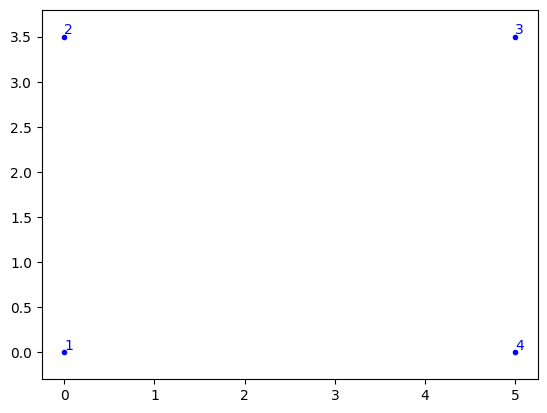

In [36]:
ops.wipe()

# Geometría
ops.node(1, 0, 0)
ops.node(2, 0, l_col)
ops.node(3, l_viga, l_col)
ops.node(4, l_viga, 0)

# Condiciones de frontera, tipo de apoyo
ops.fix(1, 1, 1, 1)
ops.fix(4, 1, 1, 1)

# Plotear el modelo
opsv.plot_model()

<Axes: >

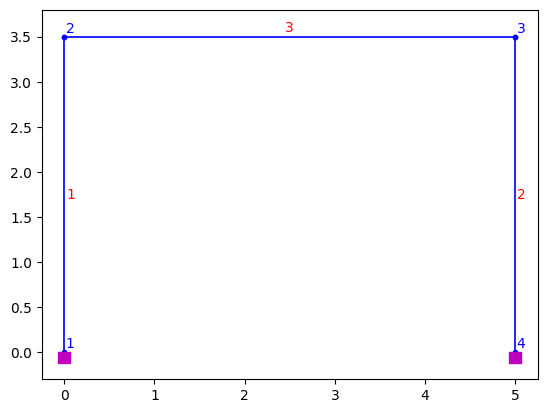

In [37]:
# Defino las columnas y vigas

ops.geomTransf('Linear', 1)

# columnas
ops.element("elasticBeamColumn", 1, 1, 2, Acol, E, Izcol, 1)
ops.element("elasticBeamColumn", 2, 4, 3, Acol, E, Izcol, 1)

# viga
ops.element("elasticBeamColumn", 3, 2, 3, Aviga, E, Izviga, 1)

opsv.plot_model()

In [38]:
# agregar cargas

# Puntual
P = -1e+3

# Carga distribuída w = (x,y)
wx = 0.
wy = -8e+3

wx2 = -1e+3
wy2 = 0

wx3 = 5e+2
wy3 = 0

Carga_dist = {3: ['-beamUniform', wy, wx], 1: ['-beamUniform', wx2, wy2], 2: ['-beamUniform', wx3,  wy3]}

# Defino las opciones para el modelo
ops.timeSeries('Constant', 1)
ops.pattern('Plain', 1, 1)

# Agregamos las cargas a nuestro modelo
ops.load(2, P, 0, 0)

# Agregamos la carga distribuida
for c in Carga_dist:
    ops.eleLoad('-ele', c, '-type', Carga_dist[c][0], Carga_dist[c][1], Carga_dist[c][2])


In [39]:
# Análisis estructural

ops.constraints('Transformation')
ops.numberer('RCM')
ops.system('BandGeneral')
ops.test('NormDispIncr', 1.0e-6, 6, 2)
ops.algorithm('Linear')
ops.integrator('LoadControl', 1)
ops.analysis('Static')

ops.analyze(1)

0

<Axes: >

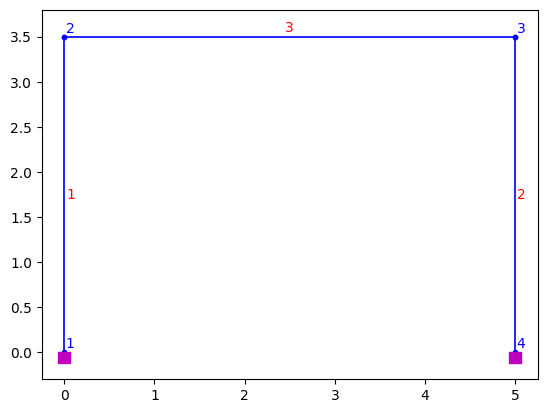

In [29]:
opsv.plot_model()

<Axes: >

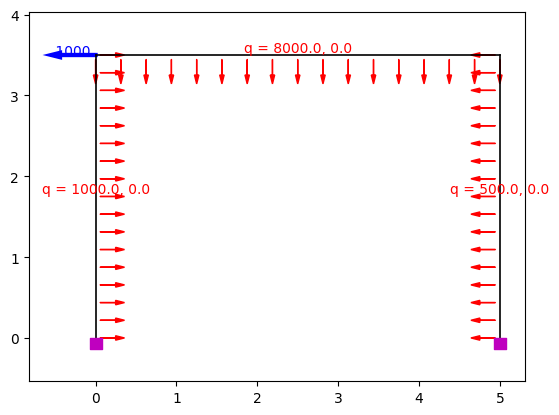

In [40]:
opsv.plot_loads_2d()

# Deformada

889.5953850757384

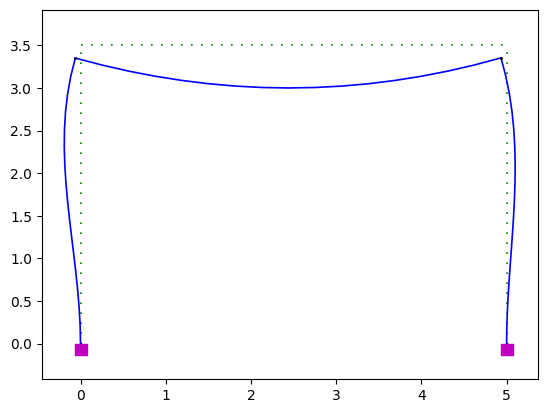

In [41]:
opsv.plot_defo()

# Diagrama de fuerzas axiales


(-1336.5107829157764, -1336.5107829157764, <Axes: >)

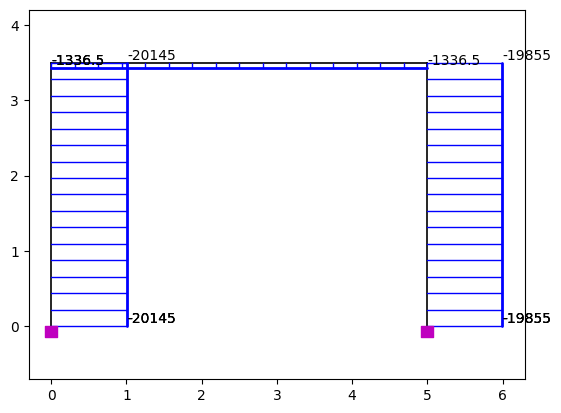

In [42]:
sfacN = 5.e-5 # fuerzas axiales
sfacV = 5.e-5 # fuerzas cortantes
sfacM = 5.e-5 # momentos
opsv.section_force_diagram_2d('N', sfacN)

# Diagrama de fuerzas cortantes


(-19855.36337443171, 20144.63662556829, <Axes: >)

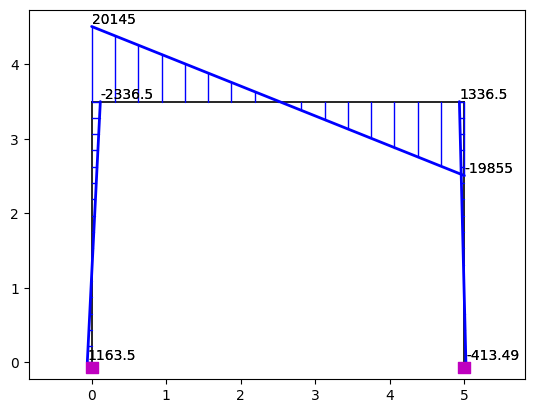

In [43]:
opsv.section_force_diagram_2d('T', sfacV)

# Diagrama de Momentos


(-2351.507312843105, 23010.084251077627, <Axes: >)

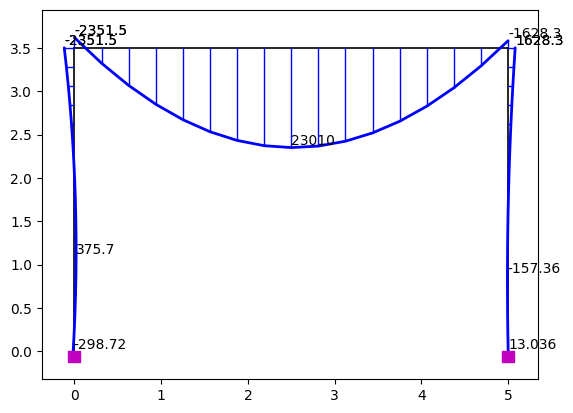

In [44]:
opsv.section_force_diagram_2d('M', sfacM)